<h3><font style="color:red;">Title:- </font>
  : Develop multi class classifier using deep multilayer perceptron (Keras/tensorflow/pytorch) for MNIST hand recognition dataset and CIFAR10. <br></h3>
  <h4>
1. Fine the parameters for better accuracy.<br>
2. Analyze the model accuracy and generate classification report. Plot accuracy and loss graph.<br>
3. Develop application with GUI to upload input to the system.<br>
4. Test the model.

</h4>

<h3><font style="color:red;">Objectives:- </font></h3>
1. Learn Deep Neural Network modeling<br>
2. Learn to develop and deploy models


<h3><font style="color:red;">Implementation Code:</font></h3>
1. Handwritten Digit Classification(mnist)<br>
2. Cifar10 

<h3><font style="color:red;">Deep MLP Implementation on  MNIST Dataset</font></h3>

* MNIST is a collection of handwritten digits ranging from the number 0 to 9
* To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically

### Import All Necessary Libararies

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
from tensorflow.keras import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.keras.layers import Dense,Dropout,Activation,MaxPooling2D,Flatten,Conv2D
from tensorflow import keras

### Load the Mnist Dataset from Keras Datasets

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### View Dimensions of Dataset

In [4]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


* It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.
* Image is 28 pixel of width and heigh

### Display the count of Labels in training dataset

<AxesSubplot:ylabel='count'>

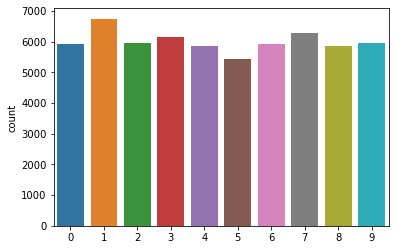

In [5]:
sns.countplot(y_train)

In [6]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


### Plot the images

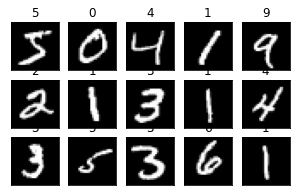

In [7]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])

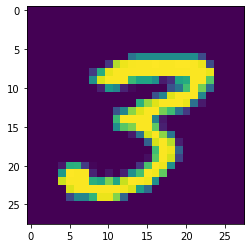

Digit in image is  3


In [8]:
plt.imshow(x_train[203])
plt.show()
print("Digit in image is ",y_train[203])

### Data Preprocessing

In [9]:
# convert to one-hot vector
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

* In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

* The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

* The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

* Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
print(x_train.shape)

(60000, 784)


In [12]:
#Since the images are pixels ranging from 0 to 255, I will normalize them
print(x_train.max())
print(x_train.min())
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.max())
print(x_train.min())

255
0
1.0
0.0


In [13]:
#we also need to modify the target
print(y_train.shape)

(60000,)


In [15]:
print(y_train[100])
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)
print(y_train[100])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Build Model Aritecture 

In [16]:
model = Sequential() 
model.add(Dense(8,input_shape = (input_size,),activation="relu"))
model.add(Dense(units = 128,kernel_regularizer=regularizers.l2(0.01),activation= "relu"))
model.add(Dense(units = 64,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 32,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 10,activation= "sigmoid"))


### View model summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                3

### Plot the model

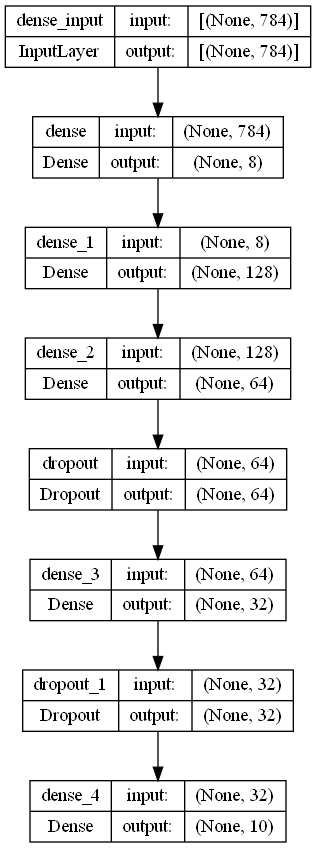

In [18]:
from keras.utils import  plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

### Compile the model

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train the model

In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 1.3492 - accuracy: 0.5548 - val_loss: 0.5127 - val_accuracy: 0.8705
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.7507 - accuracy: 0.7954 - val_loss: 0.3712 - val_accuracy: 0.9118
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.8514 - val_loss: 0.2997 - val_accuracy: 0.9310
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.5356 - accuracy: 0.8711 - val_loss: 0.2877 - val_accuracy: 0.9295
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.8804 - val_loss: 0.2645 - val_accuracy: 0.9377
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.8884 - val_loss: 0.2507 - val_accuracy: 0.9408
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.8921 - val_loss: 0.2390 - val_accuracy: 0.9437
Epoch 

### Evaluating model performance

In [21]:
print("Training Accuracy")
print(model.evaluate(x_train,y_train))
print("Test accuracy")
print(model.evaluate(x_test,y_test))

Training Accuracy
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2108 - accuracy: 0.9475
[0.2108144909143448, 0.9475333094596863]
Test accuracy
313/313 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.9402
[0.26153379678726196, 0.9401999711990356]


### Plot accuracy and loss graph

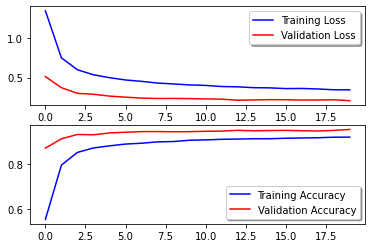

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Plot Confusion Matrix

In [23]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 0s 853us/step


<AxesSubplot:>

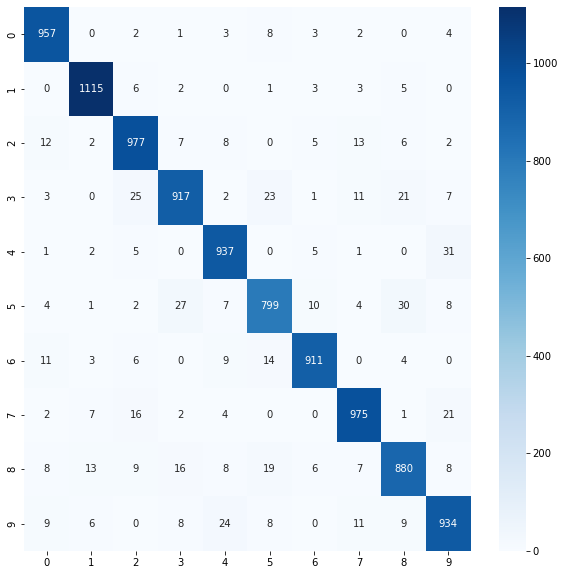

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True, fmt='g',cmap='Blues')

### Classification Report

In [30]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.94      0.91      0.92      1010
           4       0.94      0.95      0.94       982
           5       0.92      0.90      0.91       892
           6       0.97      0.95      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.92      0.90      0.91       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



### Save the Model

In [31]:
model.save("mnist_seq.h5")